In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms,models
from torchvision.utils import make_grid
from torch.utils.data import TensorDataset,DataLoader


import zipfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#!pip install pydicom

In [4]:
from pathlib import Path
import pydicom

In [5]:
path = "/content/drive/MyDrive/PyTorch_Vol3/03-Data-Formats.zip"
zip_file = zipfile.ZipFile(file = path , mode = "r")
zip_file.extractall()
zip_file.close()

----

In [6]:
file_path = "/content/03-Data-Formats/ID_0000_AGE_0060_CONTRAST_1_CT.dcm"
dicom_file = pydicom.read_file(file_path)

In [7]:
len(dicom_file)

150

In [8]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

In [9]:
dicom_file[0x0028, 0x0010]

(0028, 0010) Rows                                US: 512

In [10]:
dicom_file.Rows

512

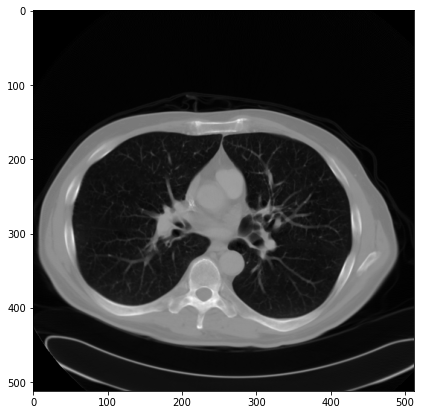

In [11]:
ct = dicom_file.pixel_array

plt.figure(figsize = (7,7))
plt.imshow(ct, cmap = "gray")
plt.show()

In [12]:
path_to_head_mri = Path("/content/03-Data-Formats/SE000001")

In [13]:
all_files = list(path_to_head_mri.glob("*"))
all_files

[PosixPath('/content/03-Data-Formats/SE000001/MR000010'),
 PosixPath('/content/03-Data-Formats/SE000001/MR000022'),
 PosixPath('/content/03-Data-Formats/SE000001/MR000005'),
 PosixPath('/content/03-Data-Formats/SE000001/MR000023'),
 PosixPath('/content/03-Data-Formats/SE000001/MR000008'),
 PosixPath('/content/03-Data-Formats/SE000001/MR000015'),
 PosixPath('/content/03-Data-Formats/SE000001/MR000009'),
 PosixPath('/content/03-Data-Formats/SE000001/MR000013'),
 PosixPath('/content/03-Data-Formats/SE000001/MR000004'),
 PosixPath('/content/03-Data-Formats/SE000001/MR000000'),
 PosixPath('/content/03-Data-Formats/SE000001/MR000019'),
 PosixPath('/content/03-Data-Formats/SE000001/MR000024'),
 PosixPath('/content/03-Data-Formats/SE000001/MR000026'),
 PosixPath('/content/03-Data-Formats/SE000001/MR000006'),
 PosixPath('/content/03-Data-Formats/SE000001/MR000003'),
 PosixPath('/content/03-Data-Formats/SE000001/MR000011'),
 PosixPath('/content/03-Data-Formats/SE000001/MR000016'),
 PosixPath('/c

In [14]:
mri_data = []
for path in all_files:
    data = pydicom.read_file(path)
    mri_data.append(data)

In [15]:
for slice in mri_data[:5]:
    print(slice.SliceLocation)

59.9999962290673
131.999997780749
29.9999952815023
137.999998321624
47.9999970362677


In [16]:
mri_data_ordered = sorted(mri_data , key = lambda slice : slice.SliceLocation)

for slice in mri_data_ordered[:5]:
    print(slice.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714


In [17]:
full_volume = []
for slice in mri_data_ordered:
    full_volume.append(slice.pixel_array)

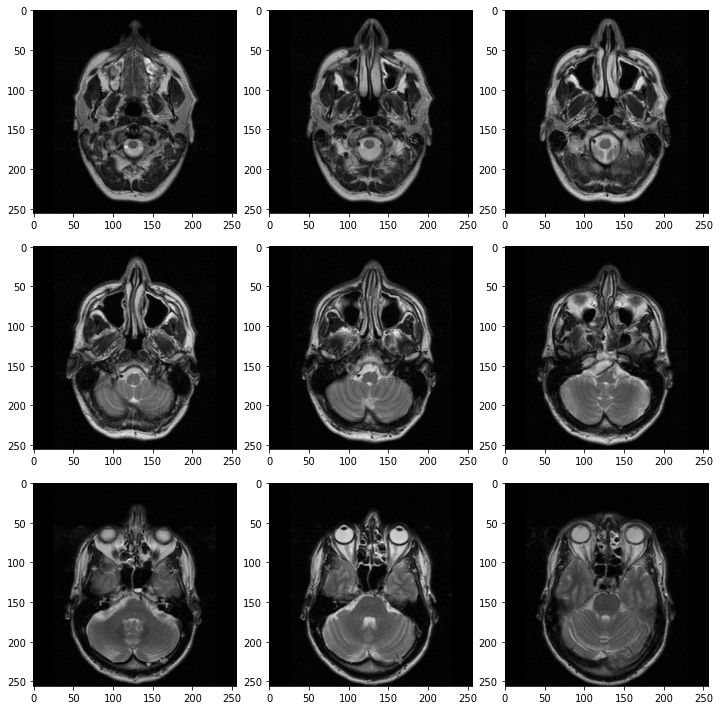

In [18]:
fig,axis = plt.subplots(3,3, figsize = (10,10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(full_volume[slice_counter],cmap = "gray")
        slice_counter+=1

plt.tight_layout()
plt.show()

----

In [19]:
!pip install SimpleITK

In [20]:
import SimpleITK as sitk

In [21]:
path_to_head_mri = Path("/content/03-Data-Formats/SE000001")
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))
print(series_ids)

('1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413262801702',)


In [22]:
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri))
print(series_file_names)

('/content/03-Data-Formats/SE000001/MR000000', '/content/03-Data-Formats/SE000001/MR000001', '/content/03-Data-Formats/SE000001/MR000002', '/content/03-Data-Formats/SE000001/MR000003', '/content/03-Data-Formats/SE000001/MR000004', '/content/03-Data-Formats/SE000001/MR000005', '/content/03-Data-Formats/SE000001/MR000006', '/content/03-Data-Formats/SE000001/MR000007', '/content/03-Data-Formats/SE000001/MR000008', '/content/03-Data-Formats/SE000001/MR000009', '/content/03-Data-Formats/SE000001/MR000010', '/content/03-Data-Formats/SE000001/MR000011', '/content/03-Data-Formats/SE000001/MR000012', '/content/03-Data-Formats/SE000001/MR000013', '/content/03-Data-Formats/SE000001/MR000014', '/content/03-Data-Formats/SE000001/MR000015', '/content/03-Data-Formats/SE000001/MR000016', '/content/03-Data-Formats/SE000001/MR000017', '/content/03-Data-Formats/SE000001/MR000018', '/content/03-Data-Formats/SE000001/MR000019', '/content/03-Data-Formats/SE000001/MR000020', '/content/03-Data-Formats/SE00000

In [23]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)

In [24]:
image_data = series_reader.Execute()

In [25]:
head_mri = sitk.GetArrayFromImage(image_data)
head_mri.shape

(27, 256, 256)

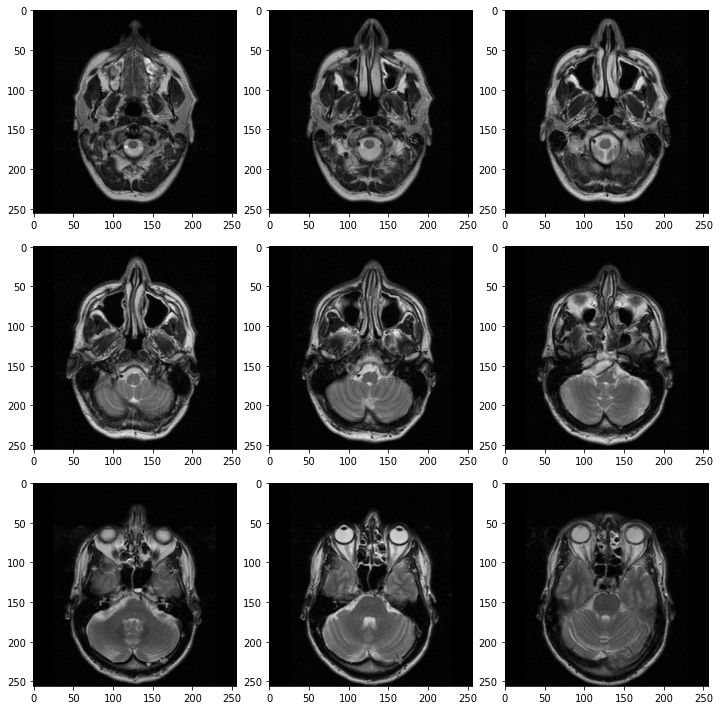

In [26]:
fig,axis = plt.subplots(3,3, figsize = (10,10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(head_mri[slice_counter],cmap = "gray")
        slice_counter+=1

plt.tight_layout()
plt.show()

----

In [27]:
!pip install dicom2nifti

In [28]:
import dicom2nifti

In [29]:
path_to_dicom = "/content/03-Data-Formats/SE000001"

In [30]:
dicom2nifti.convert_directory(path_to_dicom,".")

In [31]:
import nibabel as nib

In [32]:
nifti = nib.load("/content/201_t2w_tse.nii.gz")

In [33]:
print(nifti)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 27)
affine: 
[[-9.36898887e-01  3.20514254e-02  6.37919828e-02  1.15272324e+02]
 [ 3.03588901e-02  9.27917123e-01 -8.33337128e-01 -9.72956390e+01]
 [ 1.43172191e-02  1.29802674e-01  5.94150448e+00 -8.23735046e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal

In [34]:
nifti.header["qoffset_x"]

array(115.27232, dtype=float32)

In [35]:
nifti.shape

(256, 256, 27)

In [36]:
image_array = nifti.get_fdata()

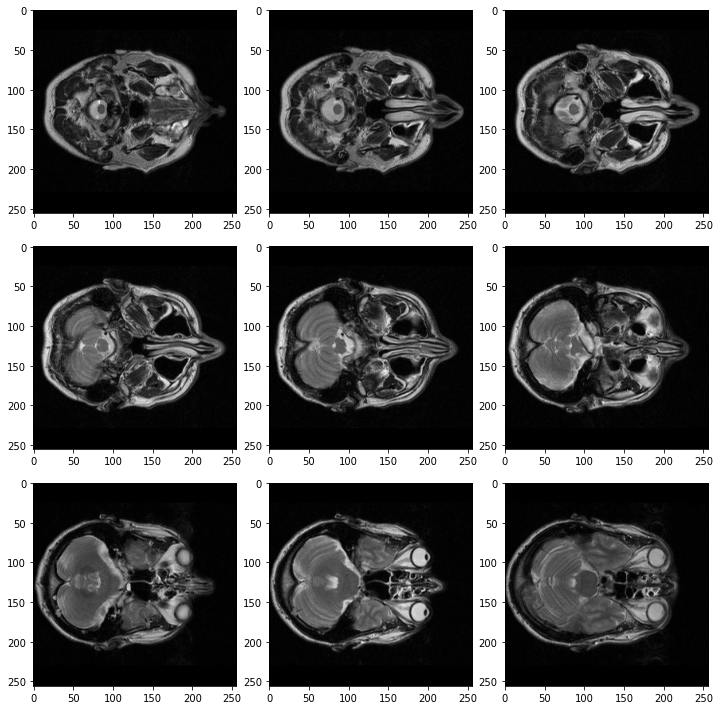

In [37]:
fig, axis = plt.subplots(3,3, figsize = (10,10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(image_array[:,:,slice_counter], cmap = "gray")
        slice_counter+=1

plt.tight_layout()
plt.show()

In [38]:
image_array_processed = image_array * (image_array > 300)

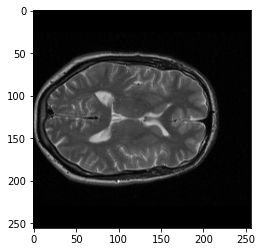

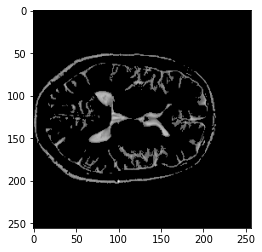

In [39]:
plt.figure()
plt.imshow(image_array[:,:,13],cmap = "gray")
plt.figure()
plt.imshow(image_array_processed[:,:,13],cmap = "gray")
plt.show()

In [40]:
processed_nifti = nib.Nifti1Image(image_array_processed, nifti.affine)
nib.save(processed_nifti, "201_t2w_tse_processed.nii.gz")

# PreProcessing

In [41]:
import nibabel as nib
import numpy as np

In [42]:
brain_mri = nib.load("/content/03-Data-Formats/03-Preprocessing/IXI662-Guys-1120-T1.nii.gz")
brain_mri_data = brain_mri.get_fdata()

In [43]:
brain_mri_data.shape

(256, 256, 150)

In [44]:
affine = brain_mri.affine
shape = brain_mri.shape

In [45]:
print(shape)
print()
print(affine)

(256, 256, 150)

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [46]:
brain_mri.header.get_zooms()

(0.9375, 0.9375, 1.2000039)

In [47]:
nib.aff2axcodes(affine)

('P', 'S', 'R')

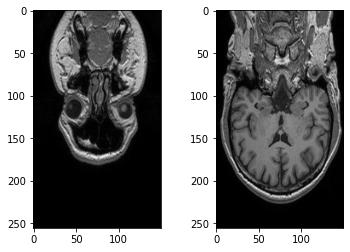

In [48]:
fig,axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[40, :, :], cmap = "gray")
axis[1].imshow(brain_mri_data[120, :, :], cmap = "gray")
plt.show()

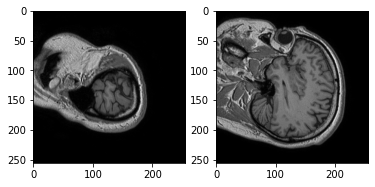

In [49]:
fig,axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[:, :, 20], cmap = "gray")
axis[1].imshow(brain_mri_data[:, :, 45], cmap = "gray")
plt.show()

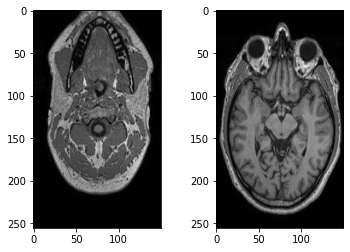

In [50]:
fig,axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[:, 30, :], cmap = "gray")
axis[1].imshow(brain_mri_data[:, 120, :], cmap = "gray")
plt.show()

In [51]:
voxel_coords = np.array((0,0,0,1))
physical_coords = affine @ voxel_coords
physical_coords

array([ -90.67985535,  102.82944489, -114.82378387,    1.        ])

In [52]:
affine[:,3:]

array([[ -90.67985535],
       [ 102.82944489],
       [-114.82378387],
       [   1.        ]])

In [53]:
voxel_coords_manual = np.array((0,0,0))
physical_coords_manual = affine[:3, :3] @ voxel_coords_manual
physical_coords_manual += affine[:3, 3]
physical_coords_manual

array([ -90.67985535,  102.82944489, -114.82378387])

In [54]:
physical_coords = [ -90.67985535,  102.82944489, -114.82378387,    1.        ]
(np.linalg.inv(affine) @ physical_coords).round()

array([-0.,  0., -0.,  1.])

# Resampling

In [55]:
print(brain_mri.shape)
print()
print(brain_mri.header.get_zooms())

(256, 256, 150)

(0.9375, 0.9375, 1.2000039)


In [58]:
!pip install nibabel -U

In [56]:
import nibabel.processing

In [57]:
voxel_size = (2,2,2)
brain_mri_resized = nibabel.processing.conform(brain_mri, (128,128,100), voxel_size , orientation = "PSR")

In [60]:
brain_mri_resized_data = brain_mri_resized.get_fdata()

In [61]:
print(brain_mri_resized.shape)
print()
print(brain_mri_resized.header.get_zooms())

(128, 128, 100)

(2.0, 2.0, 2.0)


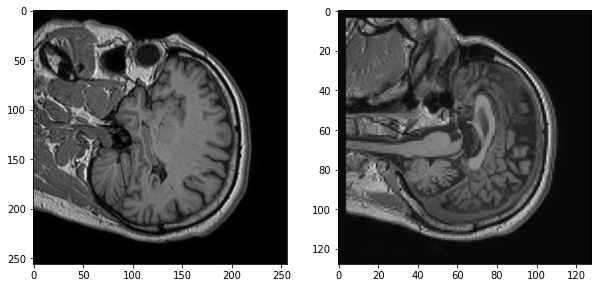

In [63]:
fig,axis = plt.subplots(1,2,figsize = (10,10))
axis[0].imshow(brain_mri_data[:,:,50], cmap = "gray")
axis[1].imshow(brain_mri_resized_data[:,:,50], cmap = "gray")

# Normalization and Standardization

In [64]:
lung_ct = nib.load("/content/03-Data-Formats/03-Preprocessing/lung_043.nii.gz")
lung_ct_data = lung_ct.get_fdata()

In [65]:
lung_ct_data_standardized = lung_ct_data / 3071

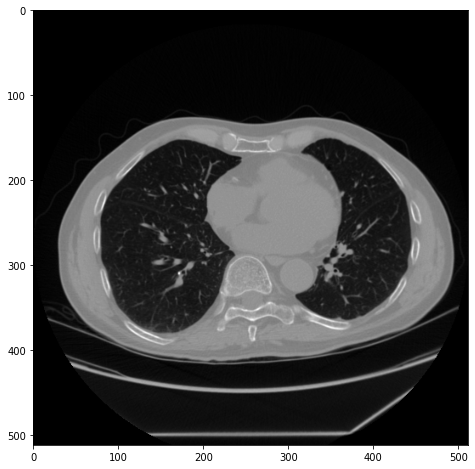

In [72]:
plt.figure(figsize = (8,8))
plt.imshow(np.rot90(lung_ct_data_standardized[:,:,50]), cmap = "gray")

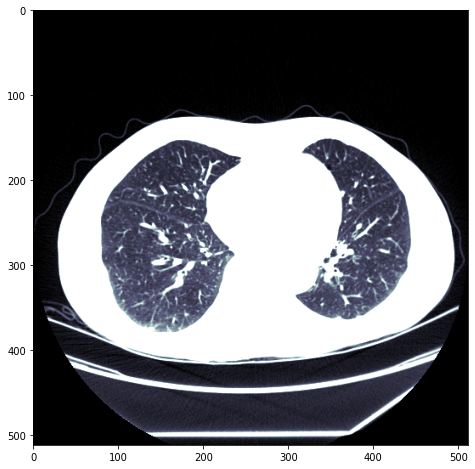

In [73]:
lung_ct_lung_window = np.clip(lung_ct_data,-1000,-500)
plt.figure(figsize = (8,8))
plt.imshow(np.rot90(lung_ct_lung_window[:,:,50]), cmap = "bone")

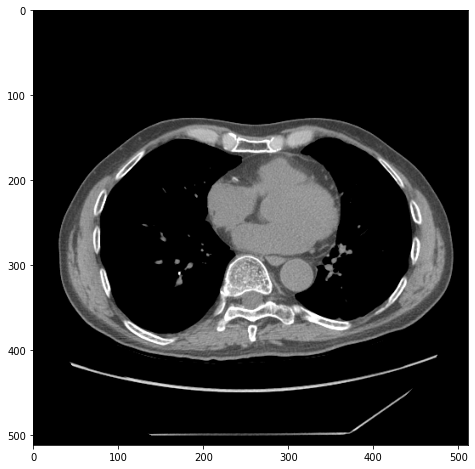

In [74]:
lung_ct_soft_tissue_window = np.clip(lung_ct_data, -250, 250)
plt.figure(figsize = (8,8))
plt.imshow(np.rot90(lung_ct_soft_tissue_window[:,:,50]), cmap = "gray")

In [77]:
cardiac_mri = nib.load("/content/03-Data-Formats/03-Preprocessing/la_003.nii.gz")
cardiac_mri_data = cardiac_mri.get_fdata()

In [79]:
mean, std = np.mean(cardiac_mri_data), np.std(cardiac_mri_data)
cardiac_mri_norm = (cardiac_mri_data - mean ) / std

In [80]:
cardiac_mri_standardized = (cardiac_mri_norm - np.min(cardiac_mri_norm)) / (np.max(cardiac_mri_norm)- np.min(cardiac_mri_norm))

In [81]:
np.mean(cardiac_mri_standardized),np.min(cardiac_mri_standardized),np.max(cardiac_mri_standardized)

(0.08641350659554545, 0.0, 1.0)

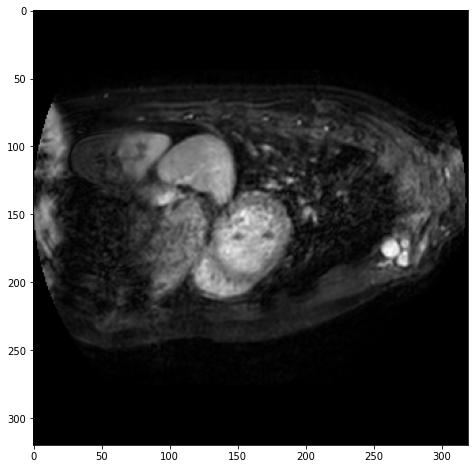

In [83]:
plt.figure(figsize = (8,8))
plt.imshow(cardiac_mri_standardized[:,:,30],cmap = "gray")